# Exploratory Data Analysis (EDA)
Use the dataset provided to do some exploratory analysis - which is not expected to be exhaustive; it only needs to demonstrate some comfort level with analytics or some interesting analysis and how to present findings

There are two additional documents, in the datasets folder, that explain the dataset value labels and the variables in the dataset. This information should be very useful as you explore the dataset.

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.gridspec as gridspec

pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Useful parameters
DATA_DIR = 'datasets/'
cocoa_sector_dataset = 'cocoa_sector_dataset.dta'
path_to_cocoa_sector_dataset = os.path.join(DATA_DIR, cocoa_sector_dataset)
print('Cocoa sector dataset is found in:', path_to_cocoa_sector_dataset)

Cocoa sector dataset is found in: datasets/cocoa_sector_dataset.dta


In [4]:
cocoa_sector_df = pd.read_stata(path_to_cocoa_sector_dataset)
print('Dataset shape', cocoa_sector_df.shape)


Dataset shape (3045, 1252)


In [5]:
cocoa_sector_df.head(3)

,today,country,region_comparable,up_region,region,sub_region,village,latitude,longitude,consent_yn,hhmem_number,male_adults_over_65,female_adults_over_65,male_adults_15_65,female_adults_15_65,male_children_5_14,female_children_5_14,male_children_0_4,female_children_0_4,dep_ratio,head_age,head_age_cat,head_gender,head_education,p1_respondent_age,age_cat,p1_respondent_gender,p1_respondent_head_yn,p1_respondent_education,p1_respondent_read,p1_respondent_marital,leader,p1_leadership_role_0,p1_leadership_role_1,p1_leadership_role_2,p1_leadership_role_3,p1_leadership_role_4,p1_leadership_role_5,p1_leadership_role_6,p1_leadership_role_7,p1_leadership_role_8,p1_leadership_role_9,p1_leadership_role_10,p1_leadership_role_11,p1_leadership_role_12,p1_leadership_role_13,p1_leadership_role_15,p1_leadership_role_16,p1_leadership_role_17,p1_leadership_role_14,p1_respondent_born_district,p1_respondent_born_region,p1_respondent_born_country,p1_business_trade,p1_respondent_fem_firstchild,male_children_5_14_school,female_children_5_14_school,incsource_biggest1,incsource_biggest2,hh_income_perc_cocoa,hh_income_perc_othercrops,hh_income_perc_livestock,hh_income_perc_fish,hh_income_perc_bushproducts,hh_income_perc_farmlabour,hh_income_perc_nonaglabour,hh_income_perc_smallbusiness,hh_income_perc_comp,hh_income_perc_govt,hh_income_perc_landsalelease,hh_income_perc_remittances,hh_income_perc_other,crops_all_produced_1,crops_all_produced_2,crops_all_produced_3,crops_all_produced_4,crops_all_produced_5,crops_all_produced_6,crops_all_produced_7,crops_all_produced_8,crops_all_produced_9,crops_all_produced_10,crops_all_produced_11,crops_all_produced_12,crops_all_produced_13,crops_all_produced_14,crops_all_produced_15,crops_all_produced_16,crops_all_produced_17,crops_all_produced_18,crops_all_produced_19,crops_all_produced_20,crops_all_produced_21,crops_all_produced_22,crops_all_produced_23,crops_all_produced_24,crops_all_produced_25,crops_all_produced_26,crops_all_produced_27,crops_all_produced_28,crops_all_produced_29,crops_all_produced_30,crops_all_produced_31,crops_all_produced_32,crops_all_produced_33,crops_all_produced_34,crops_all_produced_35,crops_all_produced_36,crops_all_produced_37,crops_all_produced_38,crops_all_produced_39,crops_all_produced_40,crops_all_produced_41,crops_all_produced_42,crops_all_produced_43,crops_all_produced_44,crops_all_produced_45,crops_all_produced_46,crops_all_produced_47,crops_all_produced_48,crops_all_produced_49,n_crops_produced,crops_all_sold_1,crops_all_sold_2,crops_all_sold_3,crops_all_sold_4,crops_all_sold_5,crops_all_sold_6,crops_all_sold_7,crops_all_sold_8,crops_all_sold_9,crops_all_sold_10,crops_all_sold_11,crops_all_sold_12,crops_all_sold_13,crops_all_sold_14,crops_all_sold_15,crops_all_sold_16,crops_all_sold_17,crops_all_sold_18,crops_all_sold_19,crops_all_sold_20,crops_all_sold_21,crops_all_sold_22,crops_all_sold_23,crops_all_sold_24,crops_all_sold_25,crops_all_sold_26,crops_all_sold_27,crops_all_sold_28,crops_all_sold_29,crops_all_sold_30,crops_all_sold_31,crops_all_sold_32,crops_all_sold_33,crops_all_sold_34,crops_all_sold_35,crops_all_sold_36,crops_all_sold_37,crops_all_sold_38,crops_all_sold_39,crops_all_sold_40,crops_all_sold_41,crops_all_sold_42,crops_all_sold_43,crops_all_sold_44,crops_all_sold_45,crops_all_sold_46,crops_all_sold_47,crops_all_sold_48,crops_all_sold_49,n_crops_sold,crops_sold_ifprod_1,crops_sold_ifprod_2,crops_sold_ifprod_3,crops_sold_ifprod_4,crops_sold_ifprod_5,crops_sold_ifprod_6,crops_sold_ifprod_7,crops_sold_ifprod_8,crops_sold_ifprod_9,crops_sold_ifprod_10,crops_sold_ifprod_11,crops_sold_ifprod_12,crops_sold_ifprod_13,crops_sold_ifprod_14,crops_sold_ifprod_15,crops_sold_ifprod_16,crops_sold_ifprod_17,crops_sold_ifprod_18,crops_sold_ifprod_19,crops_sold_ifprod_20,crops_sold_ifprod_21,crops_sold_ifprod_22,crops_sold_ifprod_23,crops_sold_ifprod_24,crops_sold_ifprod_25,crops_sold_ifprod_26,crops_sold_ifprod_27,crops_sold_ifprod_28,crops_sold_ifprod_29,crops_sold_ifprod_30,crops_sold_i

In [7]:
cocoa_sector_df['country'].value_counts()

Ghana    1560
CdI      1485
Name: country, dtype: int64

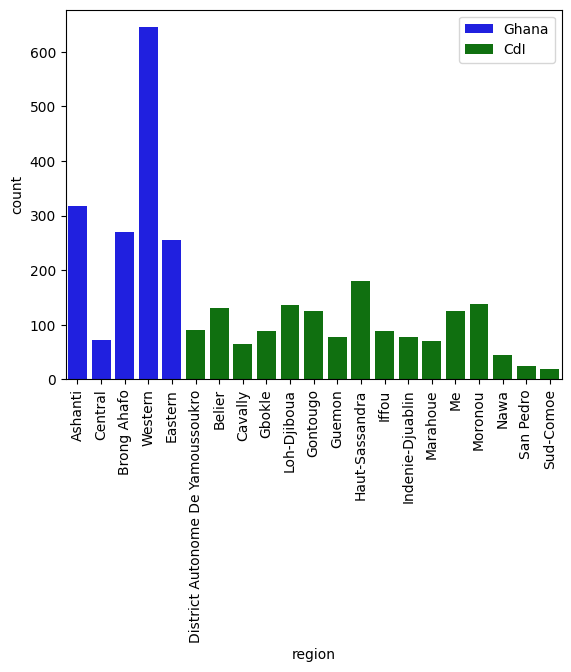

In [83]:
sns.countplot(x='region', data=cocoa_sector_df[cocoa_sector_df['country'] == 'Ghana'], color='blue', label='Ghana')
sns.countplot(x='region', data=cocoa_sector_df[cocoa_sector_df['country'] == 'CdI'], color='green', label='CdI')
plt.legend()
plt.xticks(rotation=90)
plt.show()

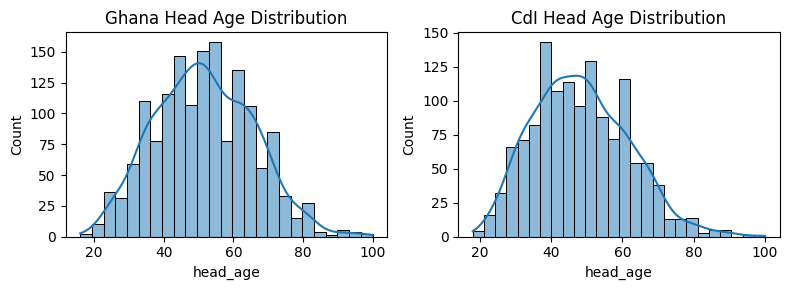

In [33]:
fig, ax = plt.subplots(1,2, figsize=(8,3))
sns.histplot(x = 'head_age', data=cocoa_sector_df[cocoa_sector_df['country'] == 'Ghana'], ax=ax[0], kde=True)
ax[0].set_title('Ghana Head Age Distribution')

sns.histplot(x = 'head_age', data=cocoa_sector_df[cocoa_sector_df['country'] == 'CdI'], ax=ax[1], kde=True)
ax[1].set_title('CdI Head Age Distribution')

fig.tight_layout()
plt.show()

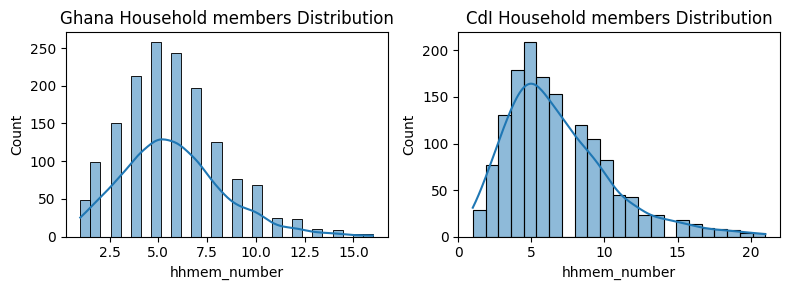

In [48]:
fig, ax = plt.subplots(1,2, figsize=(8,3))
sns.histplot(x = 'hhmem_number', data=cocoa_sector_df[cocoa_sector_df['country'] == 'Ghana'], ax=ax[0], kde=True)
ax[0].set_title('Ghana Household members Distribution')

sns.histplot(x = 'hhmem_number', data=cocoa_sector_df[cocoa_sector_df['country'] == 'CdI'], ax=ax[1], kde=True)
ax[1].set_title('CdI Household members Distribution')

fig.tight_layout()
plt.show()

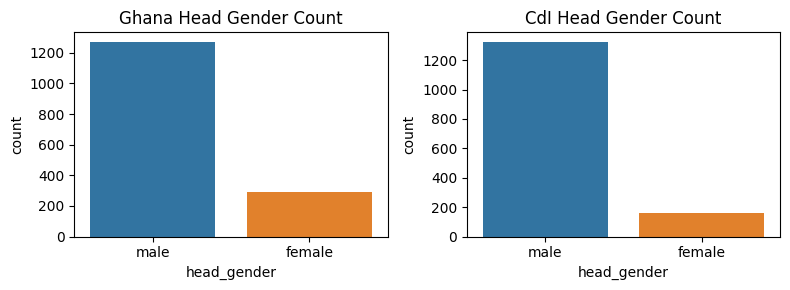

In [38]:
fig, ax = plt.subplots(1,2, figsize=(8,3))
sns.countplot(x = 'head_gender', data=cocoa_sector_df[cocoa_sector_df['country'] == 'Ghana'], ax=ax[0])
ax[0].set_title('Ghana Head Gender Count')

sns.countplot(x = 'head_gender', data=cocoa_sector_df[cocoa_sector_df['country'] == 'CdI'], ax=ax[1])
ax[1].set_title('CdI Head Gender Count')

fig.tight_layout()
plt.show()

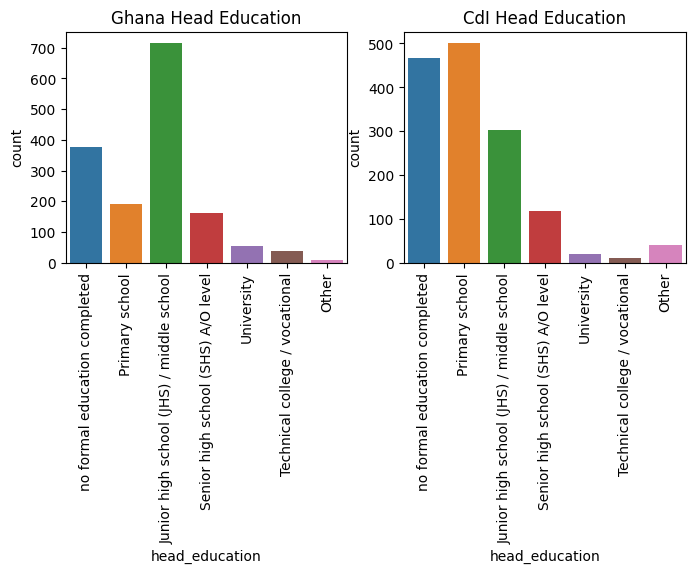

In [49]:
fig, ax = plt.subplots(1,2, figsize=(8,3))
sns.countplot(x = 'head_education', data=cocoa_sector_df[cocoa_sector_df['country'] == 'Ghana'], ax=ax[0])
ax[0].set_title('Ghana Head Education')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)

sns.countplot(x = 'head_education', data=cocoa_sector_df[cocoa_sector_df['country'] == 'CdI'], ax=ax[1])
ax[1].set_title('CdI Head Education')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)

fig.tight_layout()
plt.show()

In [90]:
df_ghana = cocoa_sector_df[cocoa_sector_df['country'] == 'Ghana']
df_cdi = cocoa_sector_df[cocoa_sector_df['country'] == 'CdI']

In [99]:
df_ghana['region'] = df_ghana['region'].astype(str)
df_cdi['region'] = df_cdi['region'].astype(str)

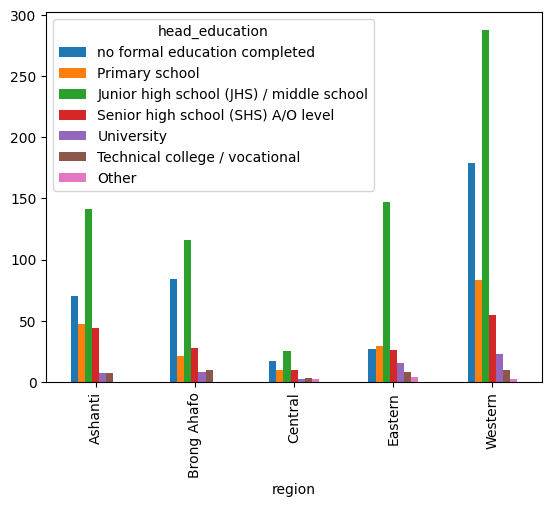

In [103]:
df_ghana.groupby(['region', 'head_education']).size().unstack().plot(kind='bar')
plt.show()

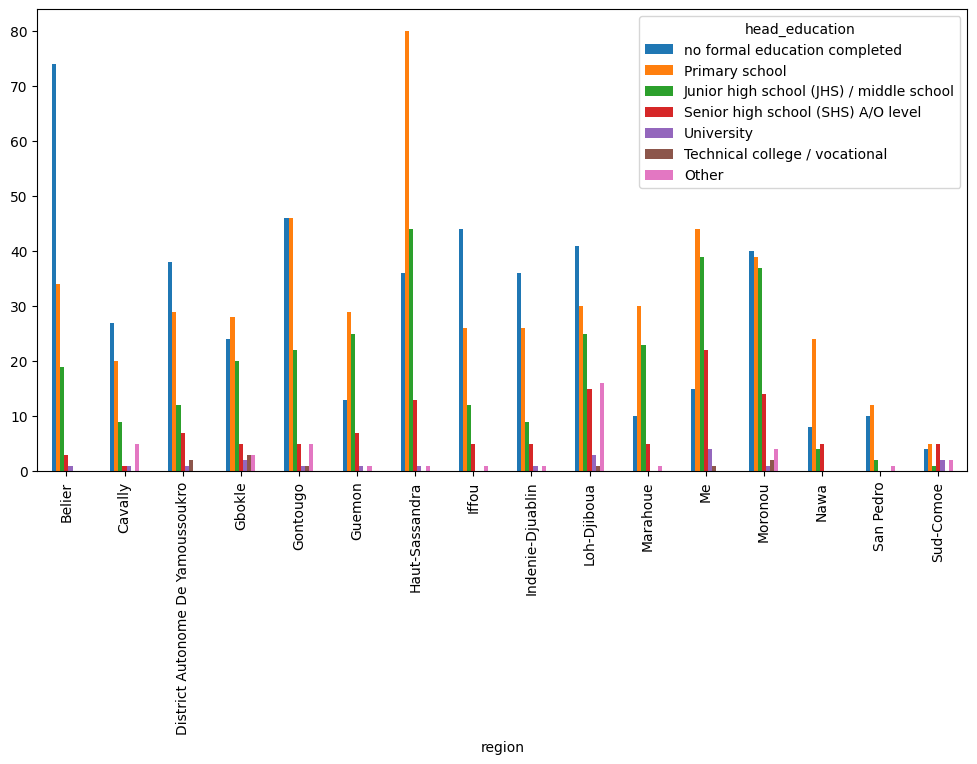

In [109]:
df_cdi.groupby(['region', 'head_education']).size().unstack().plot(kind='bar', figsize=(12,6))
plt.show()

In [50]:
cocoa_sector_df.head(2)

,today,country,region_comparable,up_region,region,sub_region,village,latitude,longitude,consent_yn,hhmem_number,male_adults_over_65,female_adults_over_65,male_adults_15_65,female_adults_15_65,male_children_5_14,female_children_5_14,male_children_0_4,female_children_0_4,dep_ratio,head_age,head_age_cat,head_gender,head_education,p1_respondent_age,age_cat,p1_respondent_gender,p1_respondent_head_yn,p1_respondent_education,p1_respondent_read,p1_respondent_marital,leader,p1_leadership_role_0,p1_leadership_role_1,p1_leadership_role_2,p1_leadership_role_3,p1_leadership_role_4,p1_leadership_role_5,p1_leadership_role_6,p1_leadership_role_7,p1_leadership_role_8,p1_leadership_role_9,p1_leadership_role_10,p1_leadership_role_11,p1_leadership_role_12,p1_leadership_role_13,p1_leadership_role_15,p1_leadership_role_16,p1_leadership_role_17,p1_leadership_role_14,p1_respondent_born_district,p1_respondent_born_region,p1_respondent_born_country,p1_business_trade,p1_respondent_fem_firstchild,male_children_5_14_school,female_children_5_14_school,incsource_biggest1,incsource_biggest2,hh_income_perc_cocoa,hh_income_perc_othercrops,hh_income_perc_livestock,hh_income_perc_fish,hh_income_perc_bushproducts,hh_income_perc_farmlabour,hh_income_perc_nonaglabour,hh_income_perc_smallbusiness,hh_income_perc_comp,hh_income_perc_govt,hh_income_perc_landsalelease,hh_income_perc_remittances,hh_income_perc_other,crops_all_produced_1,crops_all_produced_2,crops_all_produced_3,crops_all_produced_4,crops_all_produced_5,crops_all_produced_6,crops_all_produced_7,crops_all_produced_8,crops_all_produced_9,crops_all_produced_10,crops_all_produced_11,crops_all_produced_12,crops_all_produced_13,crops_all_produced_14,crops_all_produced_15,crops_all_produced_16,crops_all_produced_17,crops_all_produced_18,crops_all_produced_19,crops_all_produced_20,crops_all_produced_21,crops_all_produced_22,crops_all_produced_23,crops_all_produced_24,crops_all_produced_25,crops_all_produced_26,crops_all_produced_27,crops_all_produced_28,crops_all_produced_29,crops_all_produced_30,crops_all_produced_31,crops_all_produced_32,crops_all_produced_33,crops_all_produced_34,crops_all_produced_35,crops_all_produced_36,crops_all_produced_37,crops_all_produced_38,crops_all_produced_39,crops_all_produced_40,crops_all_produced_41,crops_all_produced_42,crops_all_produced_43,crops_all_produced_44,crops_all_produced_45,crops_all_produced_46,crops_all_produced_47,crops_all_produced_48,crops_all_produced_49,n_crops_produced,crops_all_sold_1,crops_all_sold_2,crops_all_sold_3,crops_all_sold_4,crops_all_sold_5,crops_all_sold_6,crops_all_sold_7,crops_all_sold_8,crops_all_sold_9,crops_all_sold_10,crops_all_sold_11,crops_all_sold_12,crops_all_sold_13,crops_all_sold_14,crops_all_sold_15,crops_all_sold_16,crops_all_sold_17,crops_all_sold_18,crops_all_sold_19,crops_all_sold_20,crops_all_sold_21,crops_all_sold_22,crops_all_sold_23,crops_all_sold_24,crops_all_sold_25,crops_all_sold_26,crops_all_sold_27,crops_all_sold_28,crops_all_sold_29,crops_all_sold_30,crops_all_sold_31,crops_all_sold_32,crops_all_sold_33,crops_all_sold_34,crops_all_sold_35,crops_all_sold_36,crops_all_sold_37,crops_all_sold_38,crops_all_sold_39,crops_all_sold_40,crops_all_sold_41,crops_all_sold_42,crops_all_sold_43,crops_all_sold_44,crops_all_sold_45,crops_all_sold_46,crops_all_sold_47,crops_all_sold_48,crops_all_sold_49,n_crops_sold,crops_sold_ifprod_1,crops_sold_ifprod_2,crops_sold_ifprod_3,crops_sold_ifprod_4,crops_sold_ifprod_5,crops_sold_ifprod_6,crops_sold_ifprod_7,crops_sold_ifprod_8,crops_sold_ifprod_9,crops_sold_ifprod_10,crops_sold_ifprod_11,crops_sold_ifprod_12,crops_sold_ifprod_13,crops_sold_ifprod_14,crops_sold_ifprod_15,crops_sold_ifprod_16,crops_sold_ifprod_17,crops_sold_ifprod_18,crops_sold_ifprod_19,crops_sold_ifprod_20,crops_sold_ifprod_21,crops_sold_ifprod_22,crops_sold_ifprod_23,crops_sold_ifprod_24,crops_sold_ifprod_25,crops_sold_ifprod_26,crops_sold_ifprod_27,crops_sold_ifprod_28,crops_sold_ifprod_29,crops_sold_ifprod_30,crops_sold_i

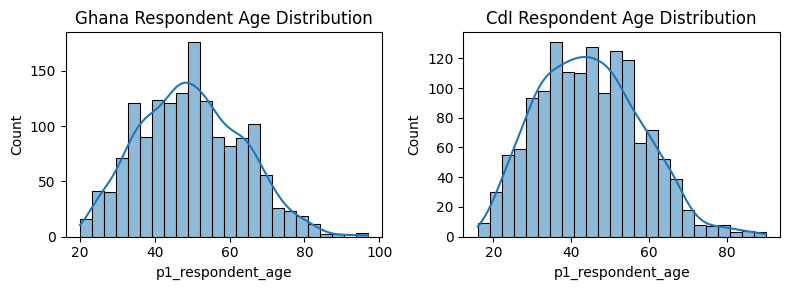

In [51]:
fig, ax = plt.subplots(1,2, figsize=(8,3))
sns.histplot(x = 'p1_respondent_age', data=cocoa_sector_df[cocoa_sector_df['country'] == 'Ghana'], ax=ax[0], kde=True)
ax[0].set_title('Ghana Respondent Age Distribution')

sns.histplot(x = 'p1_respondent_age', data=cocoa_sector_df[cocoa_sector_df['country'] == 'CdI'], ax=ax[1], kde=True)
ax[1].set_title('CdI Respondent Age Distribution')

fig.tight_layout()
plt.show()

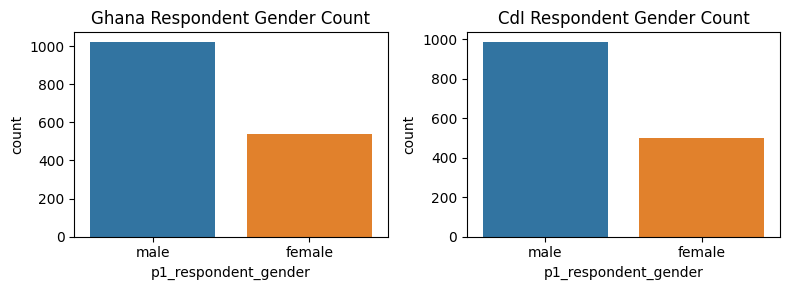

In [52]:
fig, ax = plt.subplots(1,2, figsize=(8,3))
sns.countplot(x = 'p1_respondent_gender', data=cocoa_sector_df[cocoa_sector_df['country'] == 'Ghana'], ax=ax[0])
ax[0].set_title('Ghana Respondent Gender Count')

sns.countplot(x = 'p1_respondent_gender', data=cocoa_sector_df[cocoa_sector_df['country'] == 'CdI'], ax=ax[1])
ax[1].set_title('CdI Respondent Gender Count')

fig.tight_layout()
plt.show()

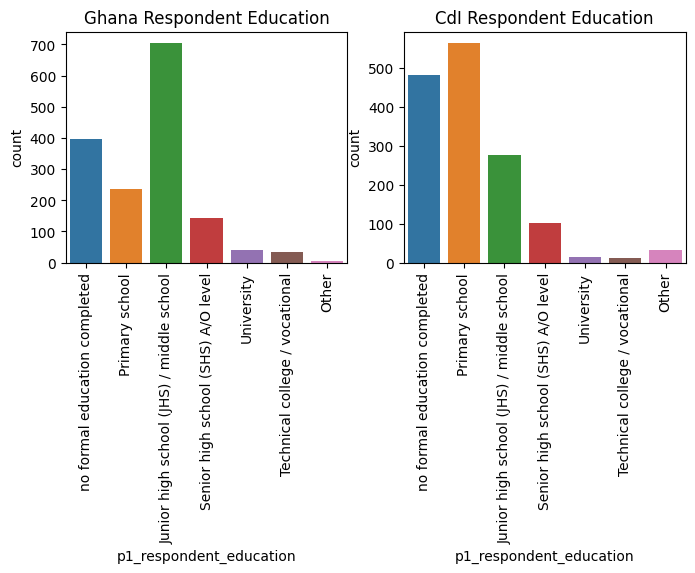

In [54]:
fig, ax = plt.subplots(1,2, figsize=(8,3))
sns.countplot(x = 'p1_respondent_education', data=cocoa_sector_df[cocoa_sector_df['country'] == 'Ghana'], ax=ax[0])
ax[0].set_title('Ghana Respondent Education')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)

sns.countplot(x = 'p1_respondent_education', data=cocoa_sector_df[cocoa_sector_df['country'] == 'CdI'], ax=ax[1])
ax[1].set_title('CdI Respondent Education')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)

fig.tight_layout()
plt.show()


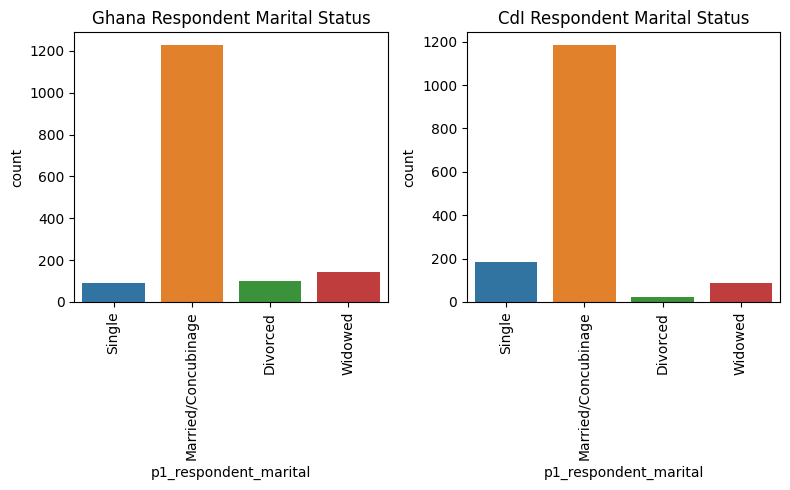

In [87]:
fig, ax = plt.subplots(1,2, figsize=(8,5))
sns.countplot(x = 'p1_respondent_marital', data=cocoa_sector_df[cocoa_sector_df['country'] == 'Ghana'], ax=ax[0])
ax[0].set_title('Ghana Respondent Marital Status')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)

sns.countplot(x = 'p1_respondent_marital', data=cocoa_sector_df[cocoa_sector_df['country'] == 'CdI'], ax=ax[1])
ax[1].set_title('CdI Respondent Marital Status')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)

fig.tight_layout()
plt.show()


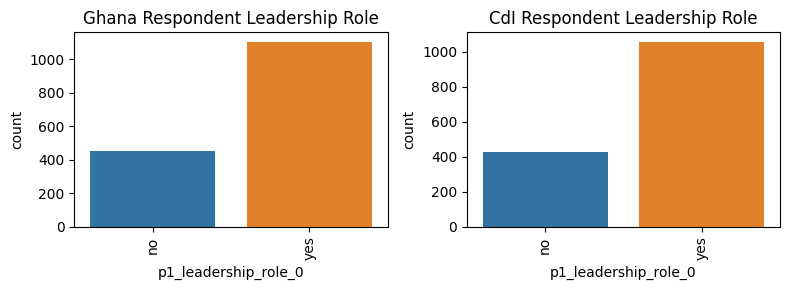

In [89]:
fig, ax = plt.subplots(1,2, figsize=(8,3))
sns.countplot(x = 'p1_leadership_role_0', data=cocoa_sector_df[cocoa_sector_df['country'] == 'Ghana'], ax=ax[0])
ax[0].set_title('Ghana Respondent Leadership Role')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)

sns.countplot(x = 'p1_leadership_role_0', data=cocoa_sector_df[cocoa_sector_df['country'] == 'CdI'], ax=ax[1])
ax[1].set_title('CdI Respondent Leadership Role')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)

fig.tight_layout()
plt.show()


In [85]:
cocoa_sector_df.head(2)

,today,country,region_comparable,up_region,region,sub_region,village,latitude,longitude,consent_yn,hhmem_number,male_adults_over_65,female_adults_over_65,male_adults_15_65,female_adults_15_65,male_children_5_14,female_children_5_14,male_children_0_4,female_children_0_4,dep_ratio,head_age,head_age_cat,head_gender,head_education,p1_respondent_age,age_cat,p1_respondent_gender,p1_respondent_head_yn,p1_respondent_education,p1_respondent_read,p1_respondent_marital,leader,p1_leadership_role_0,p1_leadership_role_1,p1_leadership_role_2,p1_leadership_role_3,p1_leadership_role_4,p1_leadership_role_5,p1_leadership_role_6,p1_leadership_role_7,p1_leadership_role_8,p1_leadership_role_9,p1_leadership_role_10,p1_leadership_role_11,p1_leadership_role_12,p1_leadership_role_13,p1_leadership_role_15,p1_leadership_role_16,p1_leadership_role_17,p1_leadership_role_14,p1_respondent_born_district,p1_respondent_born_region,p1_respondent_born_country,p1_business_trade,p1_respondent_fem_firstchild,male_children_5_14_school,female_children_5_14_school,incsource_biggest1,incsource_biggest2,hh_income_perc_cocoa,hh_income_perc_othercrops,hh_income_perc_livestock,hh_income_perc_fish,hh_income_perc_bushproducts,hh_income_perc_farmlabour,hh_income_perc_nonaglabour,hh_income_perc_smallbusiness,hh_income_perc_comp,hh_income_perc_govt,hh_income_perc_landsalelease,hh_income_perc_remittances,hh_income_perc_other,crops_all_produced_1,crops_all_produced_2,crops_all_produced_3,crops_all_produced_4,crops_all_produced_5,crops_all_produced_6,crops_all_produced_7,crops_all_produced_8,crops_all_produced_9,crops_all_produced_10,crops_all_produced_11,crops_all_produced_12,crops_all_produced_13,crops_all_produced_14,crops_all_produced_15,crops_all_produced_16,crops_all_produced_17,crops_all_produced_18,crops_all_produced_19,crops_all_produced_20,crops_all_produced_21,crops_all_produced_22,crops_all_produced_23,crops_all_produced_24,crops_all_produced_25,crops_all_produced_26,crops_all_produced_27,crops_all_produced_28,crops_all_produced_29,crops_all_produced_30,crops_all_produced_31,crops_all_produced_32,crops_all_produced_33,crops_all_produced_34,crops_all_produced_35,crops_all_produced_36,crops_all_produced_37,crops_all_produced_38,crops_all_produced_39,crops_all_produced_40,crops_all_produced_41,crops_all_produced_42,crops_all_produced_43,crops_all_produced_44,crops_all_produced_45,crops_all_produced_46,crops_all_produced_47,crops_all_produced_48,crops_all_produced_49,n_crops_produced,crops_all_sold_1,crops_all_sold_2,crops_all_sold_3,crops_all_sold_4,crops_all_sold_5,crops_all_sold_6,crops_all_sold_7,crops_all_sold_8,crops_all_sold_9,crops_all_sold_10,crops_all_sold_11,crops_all_sold_12,crops_all_sold_13,crops_all_sold_14,crops_all_sold_15,crops_all_sold_16,crops_all_sold_17,crops_all_sold_18,crops_all_sold_19,crops_all_sold_20,crops_all_sold_21,crops_all_sold_22,crops_all_sold_23,crops_all_sold_24,crops_all_sold_25,crops_all_sold_26,crops_all_sold_27,crops_all_sold_28,crops_all_sold_29,crops_all_sold_30,crops_all_sold_31,crops_all_sold_32,crops_all_sold_33,crops_all_sold_34,crops_all_sold_35,crops_all_sold_36,crops_all_sold_37,crops_all_sold_38,crops_all_sold_39,crops_all_sold_40,crops_all_sold_41,crops_all_sold_42,crops_all_sold_43,crops_all_sold_44,crops_all_sold_45,crops_all_sold_46,crops_all_sold_47,crops_all_sold_48,crops_all_sold_49,n_crops_sold,crops_sold_ifprod_1,crops_sold_ifprod_2,crops_sold_ifprod_3,crops_sold_ifprod_4,crops_sold_ifprod_5,crops_sold_ifprod_6,crops_sold_ifprod_7,crops_sold_ifprod_8,crops_sold_ifprod_9,crops_sold_ifprod_10,crops_sold_ifprod_11,crops_sold_ifprod_12,crops_sold_ifprod_13,crops_sold_ifprod_14,crops_sold_ifprod_15,crops_sold_ifprod_16,crops_sold_ifprod_17,crops_sold_ifprod_18,crops_sold_ifprod_19,crops_sold_ifprod_20,crops_sold_ifprod_21,crops_sold_ifprod_22,crops_sold_ifprod_23,crops_sold_ifprod_24,crops_sold_ifprod_25,crops_sold_ifprod_26,crops_sold_ifprod_27,crops_sold_ifprod_28,crops_sold_ifprod_29,crops_sold_ifprod_30,crops_sold_i

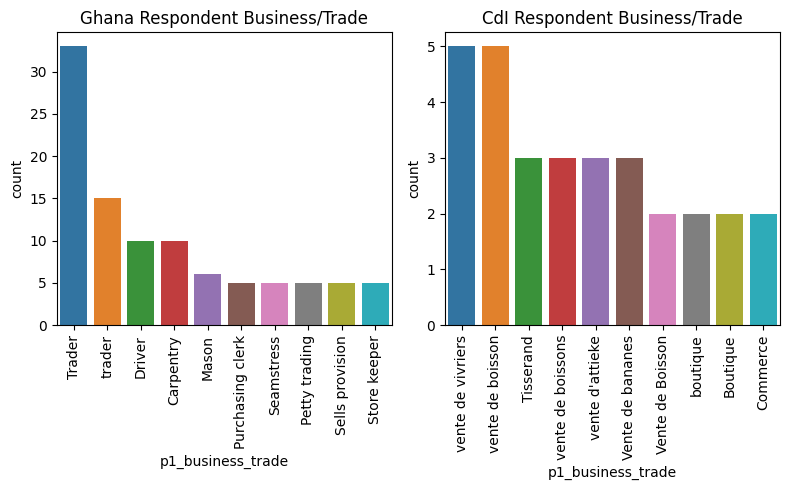

In [122]:
fig, ax = plt.subplots(1,2, figsize=(8,5))
sns.countplot(x = 'p1_business_trade', data=df_ghana,order=df_ghana['p1_business_trade'].value_counts()[1:11].index, ax=ax[0])
ax[0].set_title('Ghana Respondent Business/Trade')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)

sns.countplot(x = 'p1_business_trade', data=df_cdi,order=df_cdi['p1_business_trade'].value_counts()[1:11].index, ax=ax[1])
ax[1].set_title('CdI Respondent Business/Trade')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)

fig.tight_layout()
plt.show()


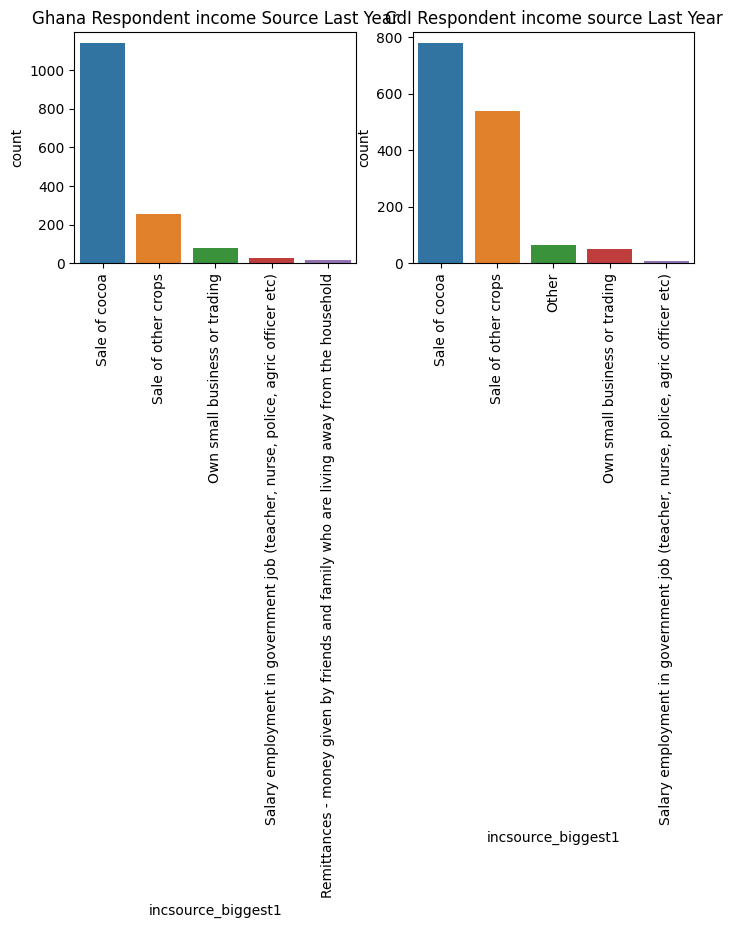

In [126]:
fig, ax = plt.subplots(1,2, figsize=(8,3))
sns.countplot(x = 'incsource_biggest1', data=df_ghana,order=df_ghana['incsource_biggest1'].value_counts()[:5].index, ax=ax[0])
ax[0].set_title('Ghana Respondent income Source Last Year')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)

sns.countplot(x = 'incsource_biggest1', data=df_cdi,order=df_cdi['incsource_biggest1'].value_counts()[:5].index, ax=ax[1])
ax[1].set_title('CdI Respondent income source Last Year')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)

fig.tight_layout()
plt.show()


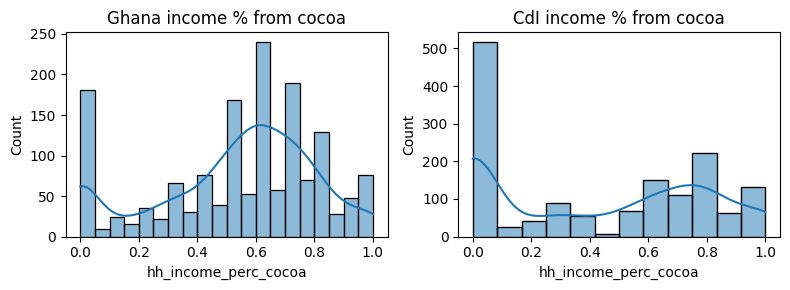

In [129]:
fig, ax = plt.subplots(1,2, figsize=(8,3))
sns.histplot(x = 'hh_income_perc_cocoa', data=df_ghana, ax=ax[0], kde=True)
ax[0].set_title('Ghana income % from cocoa')

sns.histplot(x = 'hh_income_perc_cocoa', data=df_cdi, ax=ax[1], kde=True)
ax[1].set_title('CdI income % from cocoa')

fig.tight_layout()
plt.show()

In [139]:
df_ghana['crops_all_produced_49'].value_counts()

no     1553
yes       7
Name: crops_all_produced_49, dtype: int64

In [135]:
df_ghana['crops_all_produced_44'].value_counts()

no     1558
yes       2
Name: crops_all_produced_44, dtype: int64

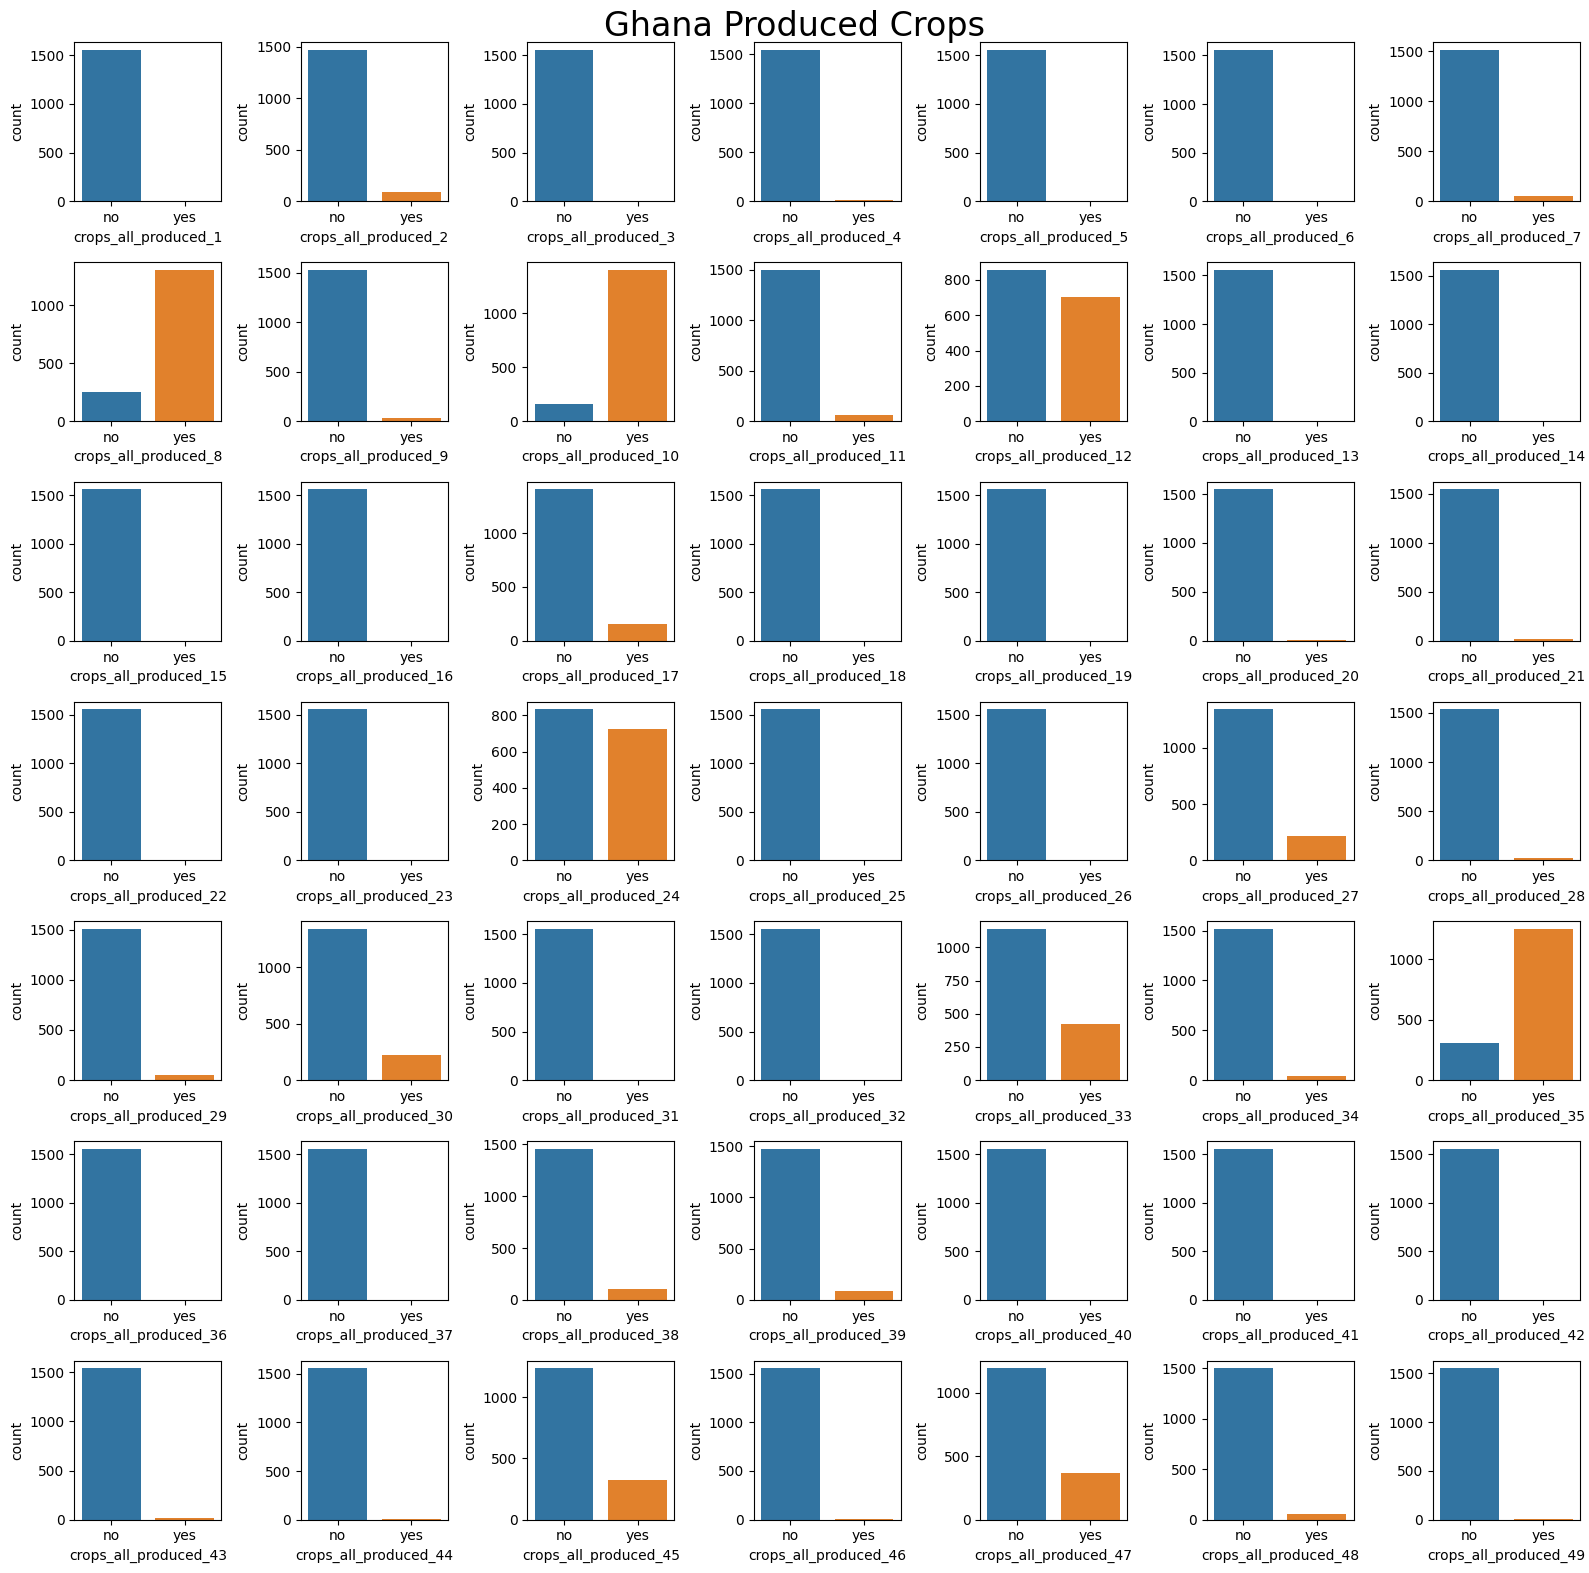

In [159]:


fig = plt.figure(figsize=(16, 16))
gs = gridspec.GridSpec(7, 7, figure=fig)

# Create a list of variable names
variables = [f'crops_all_produced_{i}' for i in range(1,50)]

# Loop through the variables and plot the countplot in each subplot
for i, var in enumerate(variables):
    row = i // 7
    col = i % 7
    ax = fig.add_subplot(gs[row, col])
    sns.countplot(data=df_ghana, x=var, ax=ax)

# Show the plot
fig.suptitle('Ghana Produced Crops', fontsize=24)
fig.tight_layout()
plt.show()

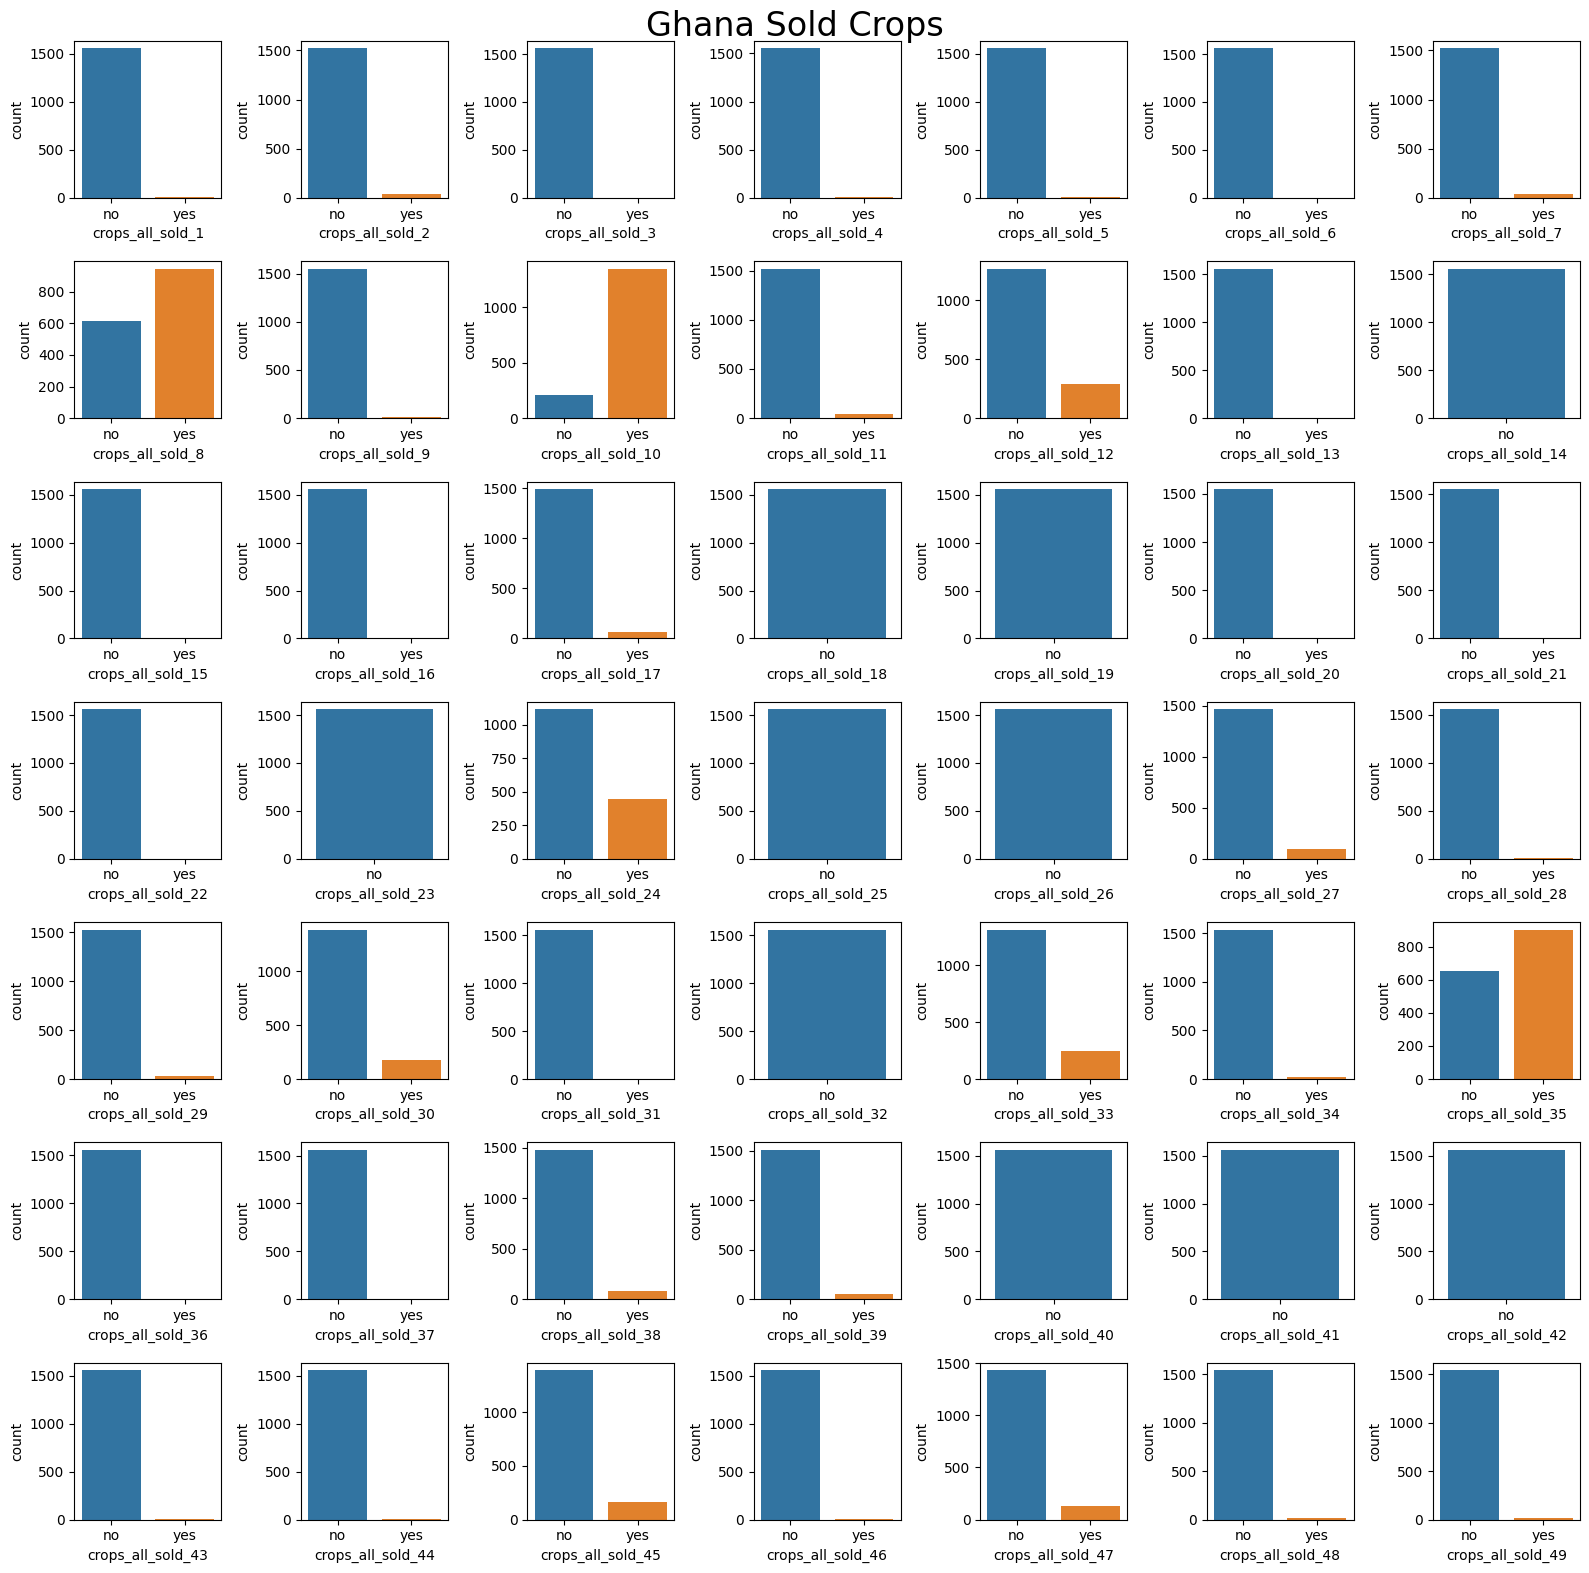

In [161]:


fig = plt.figure(figsize=(16, 16))
gs = gridspec.GridSpec(7, 7, figure=fig)

# Create a list of variable names
variables = [f'crops_all_sold_{i}' for i in range(1,50)]

# Loop through the variables and plot the countplot in each subplot
for i, var in enumerate(variables):
    row = i // 7
    col = i % 7
    ax = fig.add_subplot(gs[row, col])
    sns.countplot(data=df_ghana, x=var, ax=ax)

# Show the plot
fig.suptitle('Ghana Sold Crops', fontsize=24)
fig.tight_layout()
plt.show()

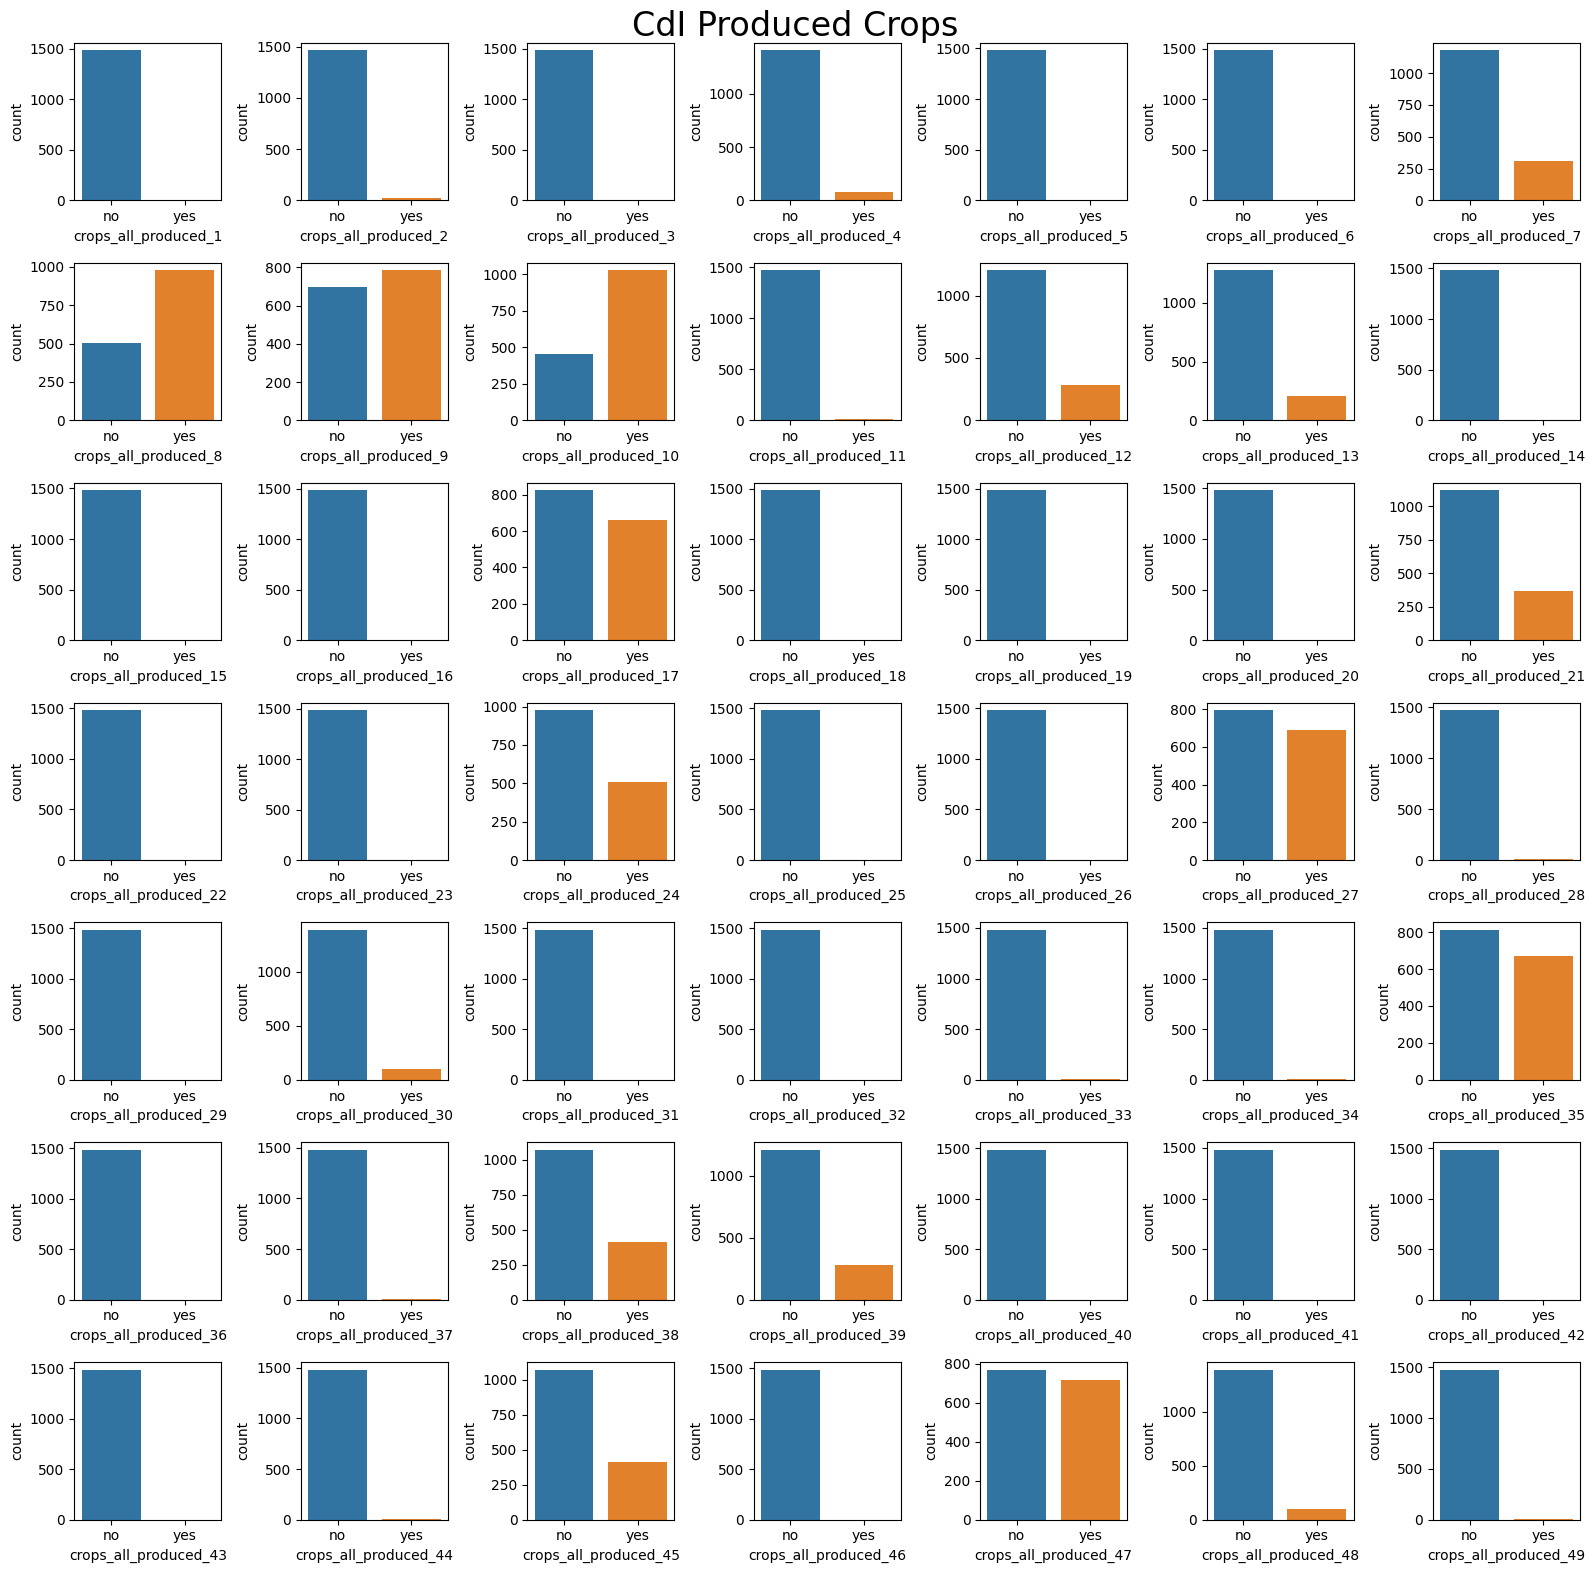

In [162]:


fig = plt.figure(figsize=(16, 16))
gs = gridspec.GridSpec(7, 7, figure=fig)

# Create a list of variable names
variables = [f'crops_all_produced_{i}' for i in range(1,50)]

# Loop through the variables and plot the countplot in each subplot
for i, var in enumerate(variables):
    row = i // 7
    col = i % 7
    ax = fig.add_subplot(gs[row, col])
    sns.countplot(data=df_cdi, x=var, ax=ax)

# Show the plot
fig.suptitle('CdI Produced Crops', fontsize=24)
fig.tight_layout()
plt.show()

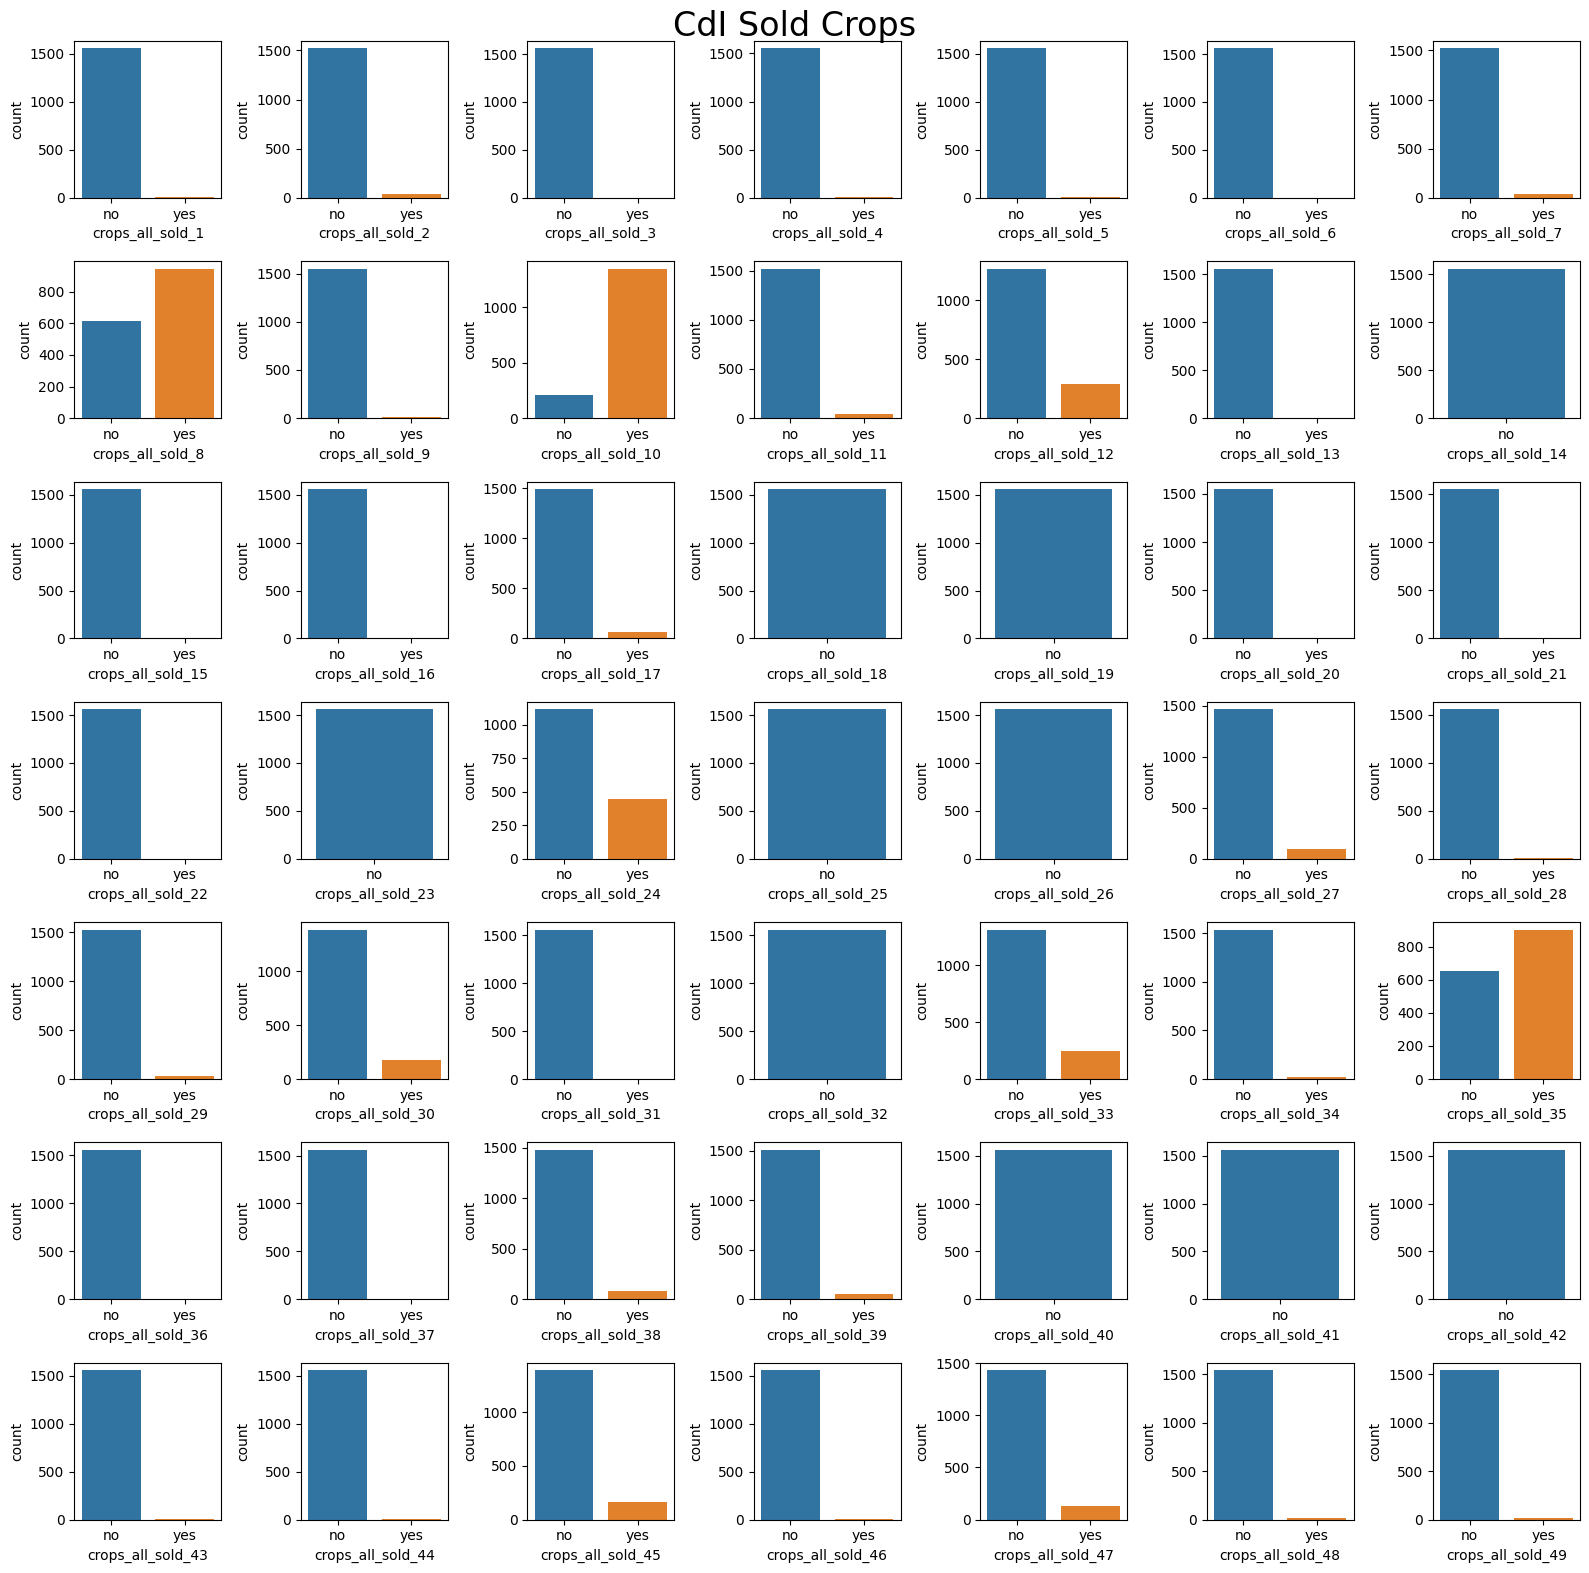

In [163]:


fig = plt.figure(figsize=(16, 16))
gs = gridspec.GridSpec(7, 7, figure=fig)

# Create a list of variable names
variables = [f'crops_all_sold_{i}' for i in range(1,50)]

# Loop through the variables and plot the countplot in each subplot
for i, var in enumerate(variables):
    row = i // 7
    col = i % 7
    ax = fig.add_subplot(gs[row, col])
    sns.countplot(data=df_ghana, x=var, ax=ax)

# Show the plot
fig.suptitle('CdI Sold Crops', fontsize=24)
fig.tight_layout()
plt.show()